### IT3311: Text & Rich Media Analytics Module (Assignment 02 - Sentimental Analysis Using Naive-Bayes Classifier)

**Bayes Theorem is named for English mathematician Thomas Bayes, who worked extensively in decision theory, the field of mathematics that involves probabilities.**

* **Bayes Theorem is also used widely in machine learning, where it is a simple, effective way to predict classes with precision and accuracy.**

* **The Bayesian method of calculating conditional probabilities is used in machine learning applications that involve classification tasks.**

* **A simplified version of the Bayes Theorem, known as the Naive Bayes Classification, is used to reduce computation time and costs.**

* **In this individual assignment, I will take you through these concepts and discuss the applications of the Bayes Theorem in machine learning.**

**Done By: Sandhya Palaniappan.**

### Summary of Functionality:
* **Imports necessary libraries: numpy for linear algebra and pandas for data processing.**
* **Walks through the /kaggle/input directory: Prints the path of each file found in the directory, which helps identify available input data files.**
* **Provides information on file storage: Explains where you can save outputs and temporary files in the Kaggle environment.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed.
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python.
# For example, here's a several helpful packages to load.

import numpy as np # linear algebra.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All".
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session.

/kaggle/input/customer-support-on-twitter/sample.csv
/kaggle/input/customer-support-on-twitter/twcs/twcs.csv
/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


### 1. Naive Bayes Theorem

### 1.1 Bayes Theorem Theory:

**Bayes Formula:**
![](https://miro.medium.com/max/804/1*6dmvRYysiU5PwWIcHRdKVw.png)

**P(C | x) = Probability of event C happening given that event x happened
P(x | C) = Probability of event x happening given that event C happened
P(C) = Probability of event C happening
P(x) = Probability of event x happening**

**The Bayes Theorem thus gives us a way to find the Conditional Probability**. **Bayes Theorem lies in the heart of the Naive Bayes theorem**.

### 1.2. How to Apply Bayes Theorem in Machine Learning:

**The Naive Bayes Classifier, a simplified version of the Bayes Theorem, is used as a classification algorithm to classify data into various classes with accuracy and speed.**

**Let’s see how the Naive Bayes Classifier can be applied as a classification algorithm.**

- **Consider a general example: X is a vector consisting of ‘n’ attributes, that is, X = {x1, x2, x3, …, xn}.**

- **Let's say we have ‘m’ classes {C1, C2, …, Cm}. Our classifier will have to predict X belongs to a certain class.**
- **The class delivering the highest posterior probability will be chosen as the best class. So mathematically, the classifier will predict for class Ci iff P(Ci | X) > P(Cj | X).**


<br>**Applying Bayes Theorem:**

**P(Ci | X) = [P(X | Ci) * P(Ci)] / P(X)**

**- In this formula, P(X) is the condition-independent entity, which means it will be constant throughout the classes. It won’t change the value whenever the classes change. Therefore, to maximize P(Ci/X), which can also be termed as the precise answer to be derived, I will have to maximize the P(X/Ci) * P(Ci) value.
**
**- With n number classes on the probability list let’s assume that the possibility of any class being the right answer is equally likely. Considering this factor, I can say that : P(C1)=P(C2)-P(C3)=P(C4)=…..=P(Cn).**

**- It is now easy to compute the smaller probabilities. One important thing to note here: since xk belongs to each attribute, I also need to check whether the attribute I are dealing with is categorical or continuous.**

**- Ultimately, I will have P(x | Ci) = F(xk, ?k, ?k).**

**Now, I have all the values I need to use Bayes Theorem for each class Ci. The predicted class will be the class achieving the highest probability P(X | Ci) * P(Ci).**

### 1.3. Advantages and Disadvantages of Naive Bayes Classifier:

### Advantage:

**- It is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction.**

**- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.**

**- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).**

### Disadvantage:

**- Naive Bayes is also known as a bad estimator, so the probability outputs are not to be taken too seriously.**

**- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.**

### 2. Sentimental Analysis

**Sentiment analysis is basically concerned with analysis of emotions and opinions from text.**

**A sentiment evaluation system for text analysis combines natural language processing (NLP) and laptop mastering methods to assign weighted sentiment scores to the entities, topics, issues and categories inside a sentence or phrase. It tries to find and justify sentiment of the person with respect to a given source of content.**

**I am proposing a highly accurate model of sentiment analysis from a datasets containing movie review score with the help of classifiers such as Naïve Bayes, the application can correctly classify the reviews of the given datasets as positive and negative to give sentiment of each movie.**

### 3. Sentiment Analysis for Movie Review Using Naive Bayes
**In this kernel, I will have to predict the number of positive and negative reviews based on sentiments by using Navie-Bayes classification models.**

### 3.1. Understanding the Data:
* **IMDB dataset having 50K movie reviews for Natural Language Processing (NLP) or Text Analytics.**

* **This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets.**

* **I will provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing.**

In [ ]:
# Import necessary libraries.
import pandas as pd  # For data manipulation and analysis.
import matplotlib.pyplot as plt  # For creating static visualizations.
import plotly.express as px  # For creating interactive visualizations.

# Import libraries for text processing and natural language processing.
from wordcloud import WordCloud  # For generating word clouds.
import nltk  # Natural language toolkit.
import re  # For regular expressions.
import string  # For string operations.
from nltk.corpus import stopwords  # For stopwords.

# Download necessary NLTK datasets.
nltk.download('punkt')  # Tokenizer models.
nltk.download('stopwords')  # Stopwords list.
from nltk.tokenize import word_tokenize  # For tokenizing text.
from nltk.stem import WordNetLemmatizer  # For lemmatizing words.

# Get the list of stopwords.
stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Import the data.
# Read the IMDB dataset from the specified file path.
df = pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

# Display the first few rows of the dataframe to check if the data has been loaded correctly.
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
# Display a summary of the dataframe to understand its structure and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Display descriptive statistics of the dataframe, transposed for better readability.
df.describe().T

count unique                                                top  \
review     50000  49582  Loved today's show!!! It was a variety and not...   
sentiment  50000      2                                           positive   

            freq  
review         5  
sentiment  25000

### 3.2. Exploratory Data Analysis (EDA) and Data Preprocessing:

**In this section, I will perform Exploratory Data Analysis (EDA) to understand the structure and characteristics of the dataset.**
* **EDA helps in summarizing the main features of the data and uncovering patterns.**
* **Data preprocessing involves cleaning and transforming the data to prepare it for analysis.**
* **This step is crucial for improving the accuracy and efficiency of the machine learning model.**

### Exploratory Data Analysis (EDA)

In [ ]:
# Display the count of each unique value in the 'sentiment' column.
# This helps to understand the distribution of sentiments (e.g., positive and negative) in the dataset.
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

**The dataset set is balanced. Next, I will take a look at the number of characters present in each sentence. This can give us a rough idea about the movie's review.**

<AxesSubplot:>

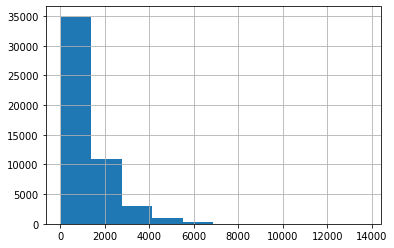

In [ ]:
# Plot a histogram of the lengths of the reviews.
# This helps to visualize the distribution of review lengths in the dataset.
df['review'].str.len().hist()

#### **Summary:**

**The histogram shows that review lengths range from 10 to 14,000 characters, with the majority of reviews generally being between 10 to 1,500 characters.**

**Now, I will move on to plot the histograms for positive and negative reviews separately. Let's proceed!**

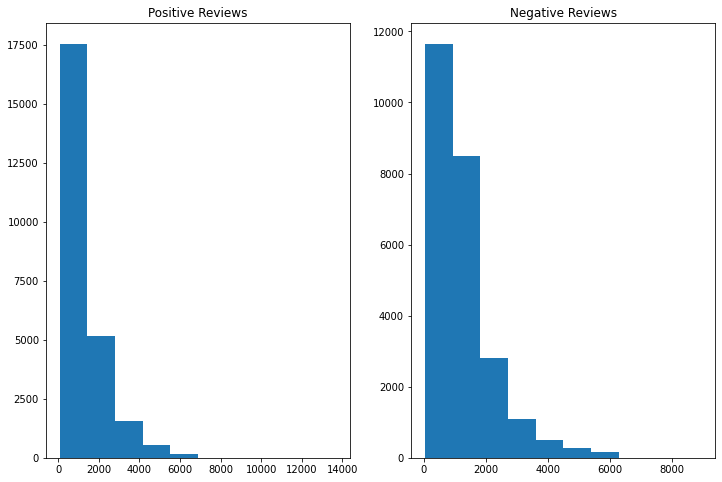

In [ ]:
# Create a figure with two subplots arranged in a 1x2 grid and set the figure size.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot a histogram of the lengths of positive reviews in the first subplot.
ax1.hist(df[df['sentiment'] == 'positive']['review'].str.len())
ax1.set_title('Positive Reviews')

# Plot a histogram of the lengths of negative reviews in the second subplot.
ax2.hist(df[df['sentiment'] == 'negative']['review'].str.len())
ax2.set_title('Negative Reviews')

# Display the plots.
plt.show()

#### **Summary:**

**I can observe some insights from the graphs above:**

* **In general, people use fewer words in positive reviews compared to negative reviews.**
* **However, the range of words in positive reviews is larger than in negative reviews.**
* **This means that, in some cases, people leave long comments for excellent movies, while they might be less critical in their comments for bad movies.**
* **Before moving on to data preprocessing, I will create word cloud graphs to visualize the most frequently used words in positive and negative reviews.**
* **Words that are used more often will appear larger, and words that are used less frequently will appear smaller.**

First 10 positive reviews:

0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
Name: review, dtype: object


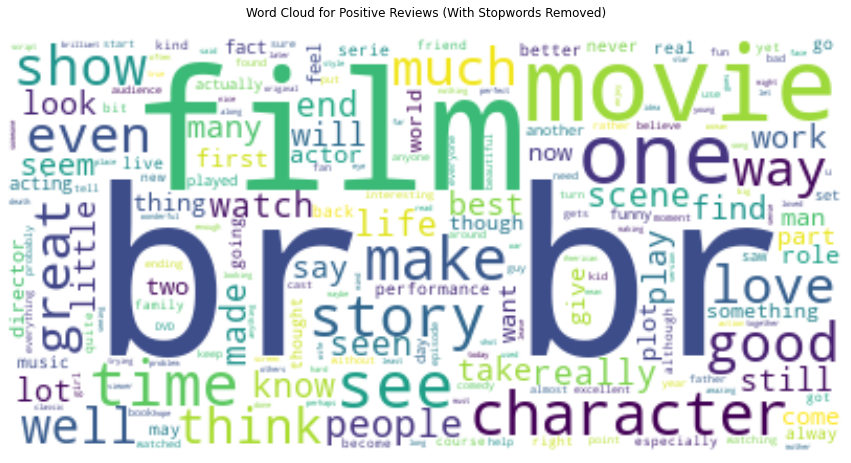

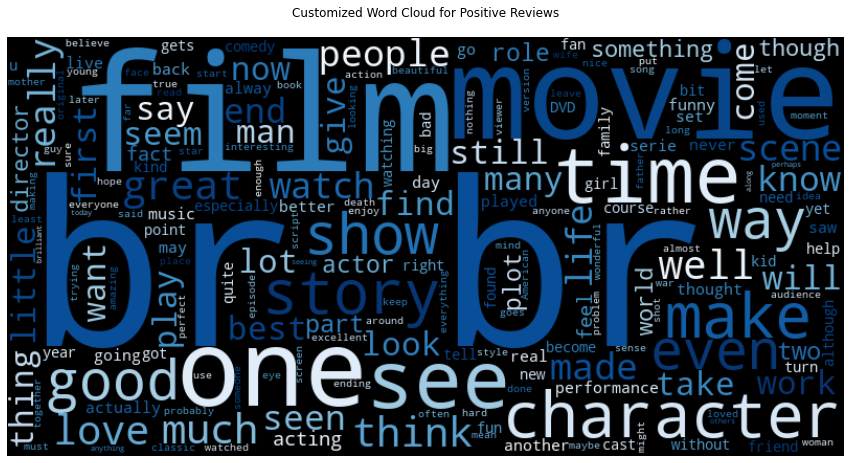

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Verify the positive reviews are correctly labeled.
positive_reviews = df[df['sentiment'] == 'positive']['review']
print("First 10 positive reviews:\n")
print(positive_reviews.head(10))  # Print the first 10 positive reviews for inspection.

# Combine all positive reviews into a single string.
text = " ".join(i for i in df[df['sentiment'] == 'positive']['review'])

# Define stopwords to exclude common words from the word cloud.
stopwords = set(STOPWORDS)

# Generate and display the word cloud with stopwords removed.
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews (With Stopwords Removed)\n')
plt.show()

# Customize and display the word cloud with additional visual enhancements.
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="black",
    width=800,
    height=400,
    max_words=200,
    colormap='Blues'
).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Customized Word Cloud for Positive Reviews\n')
plt.show()

First 10 negative reviews:

3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The cast played Shakespeare.<br /><br />Shakes...
15    Kind of drawn in by the erotic scenes, only to...
17    This movie made it into one of my top 10 most ...
19    An awful film! It must have been up against so...
Name: review, dtype: object

Negative reviews containing the word 'good':

12    So im not a big fan of Boll's work but then ag...
13    The cast played Shakespeare.<br /><br />Shakes...
19    An awful film! It must have been up against so...
21    I had the terrible misfortune of having to vie...
24    This was the worst movie I saw at WorldFest an...
28    This movie was so frustrating. Everything seem...
3

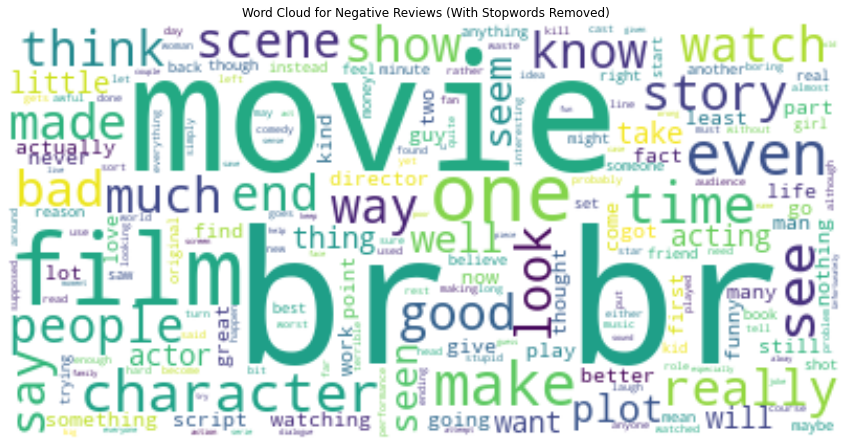

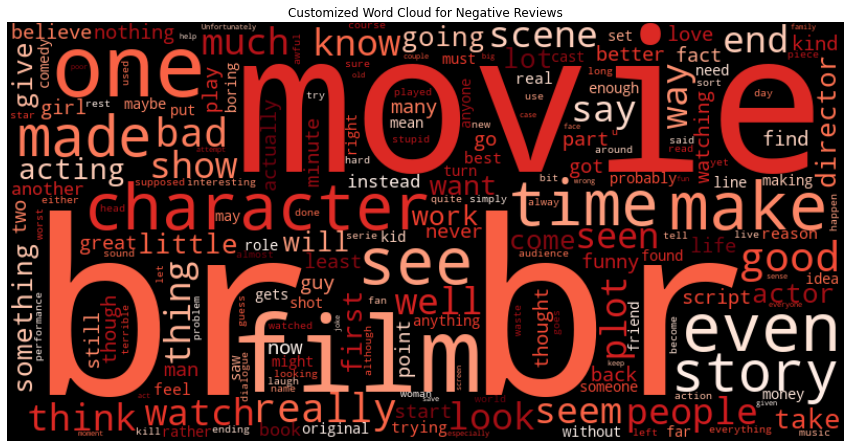

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Verify the negative reviews are correctly labeled.
negative_reviews = df[df['sentiment'] == 'negative']['review']
print("First 10 negative reviews:\n")
print(negative_reviews.head(10))  # Print the first 10 negative reviews for inspection.

# Find negative reviews containing the word "good".
negative_reviews_with_good = df[(df['sentiment'] == 'negative') & (df['review'].str.contains('good'))]

# Display a sample of these reviews
print("\nNegative reviews containing the word 'good':\n")
print(negative_reviews_with_good['review'].head(10))

# Combine all negative reviews into a single string.
text = " ".join(i for i in df[df['sentiment'] == 'negative']['review'])

# Define stopwords to exclude common words from the word cloud.
stopwords = set(STOPWORDS)

# Generate and display the word cloud with stopwords removed.
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews (With Stopwords Removed)')
plt.show()

# Customize and display the word cloud with additional visual enhancements.
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="black",
    width=800,
    height=400,
    max_words=200,
    colormap='Reds'
).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Customized Word Cloud for Negative Reviews')
plt.show()

#### **Summary:**

**The word cloud graphs for both negative and positive comments do not show meaningful results. This highlights the importance of text preprocessing.**

**Let's begin the data preprocessing process.**

### Data Preprocessing

In [ ]:
# Rename the 'review' column to 'text' for clarity.
df.rename(columns={'review': 'text'}, inplace=True)

# Display the DataFrame to check the changes.
df

text sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
def cleaning(text):
    # Convert text to lowercase.
    text = text.lower()

    # Remove URL links.
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove numbers.
    text = re.sub(r"\b\d+\b", "", text)

    # Remove HTML tags and special characters.
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove new line characters.
    text = re.sub('\n', '', text)

    # Remove specific special characters.
    text = re.sub('[’“”…]', '', text)

    # Remove emojis.
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons.
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs.
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols.
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Replace common contractions with their full forms.
    text = re.sub("isn't", 'is not', text)
    text = re.sub("he's", 'he is', text)
    text = re.sub("wasn't", 'was not', text)
    text = re.sub("there's", 'there is', text)
    text = re.sub("couldn't", 'could not', text)
    text = re.sub("won't", 'will not', text)
    text = re.sub("they're", 'they are', text)
    text = re.sub("she's", 'she is', text)
    text = re.sub("There's", 'there is', text)
    text = re.sub("wouldn't", 'would not', text)
    text = re.sub("haven't", 'have not', text)
    text = re.sub("That's", 'That is', text)
    text = re.sub("you've", 'you have', text)
    text = re.sub("He's", 'He is', text)
    text = re.sub("what's", 'what is', text)
    text = re.sub("weren't", 'were not', text)
    text = re.sub("we're", 'we are', text)
    text = re.sub("hasn't", 'has not', text)
    text = re.sub("you'd", 'you would', text)
    text = re.sub("shouldn't", 'should not', text)
    text = re.sub("let's", 'let us', text)
    text = re.sub("they've", 'they have', text)
    text = re.sub("You'll", 'You will', text)
    text = re.sub("i'm", 'i am', text)
    text = re.sub("we've", 'we have', text)
    text = re.sub("it's", 'it is', text)
    text = re.sub("don't", 'do not', text)
    text = re.sub("that´s", 'that is', text)
    text = re.sub("I´m", 'I am', text)
    text = re.sub("it’s", 'it is', text)
    text = re.sub("she´s", 'she is', text)
    text = re.sub("he’s'", 'he is', text)
    text = re.sub('I’m', 'I am', text)
    text = re.sub('I’d', 'I did', text)
    text = re.sub('there’s', 'there is', text)

    return text

# Apply the cleaning function to the 'text' column in the DataFrame.
dt = df['text'].apply(cleaning)

In [ ]:
# Display the 'sentiment' column of the DataFrame.
df['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [ ]:
# Convert the cleaned text data into a new DataFrame.
dt = pd.DataFrame(dt)

# Add the 'sentiment' column from the original DataFrame to the new DataFrame.
dt['sentiment'] = df['sentiment']

# Display the new DataFrame to check the changes.
dt

text sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production the filming tech...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
# Remove stopwords from the text data.
# This creates a new column 'no_sw' where stopwords are removed from the 'text' column.
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
# Display the updated DataFrame to check the changes.
dt

text sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production the filming tech...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically theres a family where a little boy j...  negative   
4      petter matteis love in the time of money is a ...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  im going to have to disagree with the previous...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                                   no_sw  
0      reviewers mentioned watching oz episode youll ...  
1      wonderful production filming technique unassum...  
2      wonderful spend time hot summer weekend sittin...  
3      basically family boy jake thinks zombie closet...  
4      petter matteis love time money visually stunni...  
...                                                  ...  
49995  movie job creative original expecting lotta fu...  
49996  plot dialogue acting idiotic directing annoyin...  
49997  catholic taught parochial elementary schools n...  
49998  disagree previous comment side maltin rate exc...  
49999  expects star trek movies high art fans expect ...  

[50000 rows x 3 columns]

In [ ]:
# Working with the most frequent words.
from collections import Counter

# Initialize a Counter object to count word frequencies.
cnt = Counter()

# Iterate through each text in the 'no_sw' column of the DataFrame.
for text in dt["no_sw"].values:
    # Split the text into words and update the counter.
    for word in text.split():
        cnt[word] += 1

# Get the 10 most common words and their counts.
most_common_words = cnt.most_common(10)

# Convert the most common words into a DataFrame.
temp = pd.DataFrame(most_common_words)
temp.columns = ['word', 'count']

# Display the DataFrame of the most common words.
temp

word  count
0       movie  83576
1        film  74511
2        time  23298
3       story  22062
4       great  17723
5      movies  15447
6        made  15414
7       films  15294
8        make  15284
9  characters  14657

#### **Summary:**

* **In this section, I analyzed the most frequent words in the dataset after removing stopwords.**
* **I counted the word frequencies and identified the top 10 most common words.**
* **The words "movie", "film", "time", "story", "great", "movies", and "made" are indeed the most frequently used words in the reviews, with a noticeable drop in frequency after "made".**
* **This analysis helps me understand the common themes and vocabulary used by reviewers.**

In [ ]:
# Create a horizontal bar plot of the most common words using Plotly Express.
import plotly.express as px

# Plot the bar chart.
fig = px.bar(temp, x="count", y="word", title='Common Words in Text', orientation='h',
             width=700, height=700)

# Display the plot.
fig.show()

#### **Summary:**

* **The results showed that words like "movie", "film", "time", "story", "great", "movies", and "made" are the most frequently used words in the reviews.**
* **These words appear significantly more often than others, indicating common themes and vocabulary used by reviewers.**
* **This analysis helps in understanding the prevalent topics and sentiments in the movie reviews.**

In [ ]:
# Remove the most frequent words.
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    """Custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

# Apply the function to remove frequent words from the 'no_sw' column.
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))

# Display the first few rows of the updated DataFrame to check the changes.
dt.head()

text sentiment  \
0  one of the other reviewers has mentioned that ...  positive   
1  a wonderful little production the filming tech...  positive   
2  i thought this was a wonderful way to spend ti...  positive   
3  basically theres a family where a little boy j...  negative   
4  petter matteis love in the time of money is a ...  positive   

                                               no_sw  \
0  reviewers mentioned watching oz episode youll ...   
1  wonderful production filming technique unassum...   
2  wonderful spend time hot summer weekend sittin...   
3  basically family boy jake thinks zombie closet...   
4  petter matteis love time money visually stunni...   

                                         wo_stopfreq  
0  reviewers mentioned watching oz episode youll ...  
1  wonderful production filming technique unassum...  
2  wonderful spend hot summer weekend sitting air...  
3  basically family boy jake thinks zombie closet...  
4  petter matteis love money visually stunning wa...

In [ ]:
# Display the text in the 'no_sw' column at index 5.
dt['no_sw'].loc[5]

'probably alltime favorite movie story selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd movie'

In [ ]:
# Display the text in the 'wo_stopfreq' column at index 5.
dt['wo_stopfreq'].loc[5]

'probably alltime favorite selflessness sacrifice dedication noble preachy boring despite times years paul lukas performance brings tears eyes bette davis sympathetic roles delight kids grandma dressedup midgets children makes fun watch mothers slow awakening whats happening world roof believable startling dozen thumbs theyd'

In [ ]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words.
# It helps to create better features for machine learning and NLP models, hence it is an important preprocessing step.

# Initialize the WordNetLemmatizer.
wordnet_lem = WordNetLemmatizer()

# Apply lemmatization to the 'wo_stopfreq' column and create a new column 'wo_stopfreq_lem'.
dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)

# Display the updated DataFrame to check the changes.
dt

text sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production the filming tech...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically theres a family where a little boy j...  negative   
4      petter matteis love in the time of money is a ...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  im going to have to disagree with the previous...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                                   no_sw  \
0      reviewers mentioned watching oz episode youll ...   
1      wonderful production filming technique unassum...   
2      wonderful spend time hot summer weekend sittin...   
3      basically family boy jake thinks zombie closet...   
4      petter matteis love time money visually stunni...   
...                                                  ...   
49995  movie job creative original expecting lotta fu...   
49996  plot dialogue acting idiotic directing annoyin...   
49997  catholic taught parochial elementary schools n...   
49998  disagree previous comment side maltin rate exc...   
49999  expects star trek movies high art fans expect ...   

                                             wo_stopfreq  \
0      reviewers mentioned watching oz episode youll ...   
1      wonderful production filming technique unassum...   
2      wonderful spend hot summer weekend sitting air...   
3      basically family boy jake thinks zombie closet...   
4      petter matteis love money visually stunning wa...   
...                                                  ...   
49995  job creative original expecting lotta fun dvd ...   
49996  plot dialogue acting idiotic directing annoyin...   
49997  catholic taught parochial elementary schools n...   
49998  disagree previous comment side maltin rate exc...   
49999  expects star trek high art fans expect episode...   

                                         wo_stopfreq_lem  
0      reviewers mentioned watching oz episode youll ...  
1      wonderful production filming technique unassum...  
2      wonderful spend hot summer weekend sitting air...  
3      basically family boy jake thinks zombie closet...  
4      petter matteis love money visually stunning wa...  
...                                                  ...  
49995  job creative original expecting lotta fun dvd ...  
49996  plot dialogue acting idiotic directing annoyin...  
49997  catholic taught parochial elementary schools n...  
49998  disagree previous comment side maltin rate exc...  
49999  expects star trek high art fans expect episode...  

[50000 rows x 5 columns]

### 3.3. Tokenization

**Tokenization is the process of breaking down text into smaller units called tokens, such as words or phrases.**
<br>**This step is essential in natural language processing (NLP) as it converts text into a structured format that can be easily analyzed for tasks like text classification and sentiment analysis.**

In [ ]:
# Create the cleaned data for the train-test split.
# Drop the unnecessary columns: 'text', 'no_sw', and 'wo_stopfreq'.
nb = dt.drop(columns=['text', 'no_sw', 'wo_stopfreq'])

# Rename the columns for clarity.
nb.columns = ['sentiment', 'review']

# Convert sentiment labels to binary values: 0 for negative, 1 for positive.
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]

# Display the cleaned DataFrame for verification.
nb

sentiment                                             review
0              1  reviewers mentioned watching oz episode youll ...
1              1  wonderful production filming technique unassum...
2              1  wonderful spend hot summer weekend sitting air...
3              0  basically family boy jake thinks zombie closet...
4              1  petter matteis love money visually stunning wa...
...          ...                                                ...
49995          1  job creative original expecting lotta fun dvd ...
49996          0  plot dialogue acting idiotic directing annoyin...
49997          0  catholic taught parochial elementary schools n...
49998          0  disagree previous comment side maltin rate exc...
49999          0  expects star trek high art fans expect episode...

[50000 rows x 2 columns]

In [ ]:
# Tokenize the 'review' column by splitting the text into words.
# This creates a new Series where each review is represented as a list of tokens (words)
tokenized_review = nb['review'].apply(lambda x: x.split())

# Display the first 5 tokenized reviews to check the results.
tokenized_review.head(5)

0    [reviewers, mentioned, watching, oz, episode, ...
1    [wonderful, production, filming, technique, un...
2    [wonderful, spend, hot, summer, weekend, sitti...
3    [basically, family, boy, jake, thinks, zombie,...
4    [petter, matteis, love, money, visually, stunn...
Name: review, dtype: object

In [ ]:
# Import necessary libraries from scikit-learn and NLTK.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Define a tokenizer to keep only alphanumeric words.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Initialize the CountVectorizer with English stopwords, unigram range, and the custom tokenizer.
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)

# Fit the CountVectorizer to the 'review' column and transform the text into a matrix of token counts.
text_counts = cv.fit_transform(nb['review'])

### 3.4. Train-Test Split:

**In this section, I split the dataset into training and testing sets.**
* **The training set is used to train the machine learning model, while the testing set is used to evaluate its performance.**
* **This ensures that I can assess the model's ability to generalize to new, unseen data. I will use 80% of the data for training and 20% for testing.**

In [ ]:
# Import the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

# Assign the feature matrix (text_counts) to X and the target vector (sentiment) to y.
X = text_counts
y = nb['sentiment']

# Split the data into training and testing sets.
# 20% of the data will be used for testing and the rest for training.
# The random_state parameter ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

**I will now split the data into training and testing sets to evaluate how well our model performs.**
* **To avoid any potential bias, such as having all positive reviews followed by all negative reviews, I will randomize the data.**
* **I will use scikit-learn's train_test_split() function to split text_counts (our feature matrix, X) and nb['sentiment'] (our target vector, Y).**

### 3.5. Navies Bayes Modelling:
**In this section, I will go through different Naive Bayes models: ComplementNB, MultinomialNB, and BernoulliNB, and evaluate the accuracy of each model.**

### A) Complement Naive Bayes Model:

* **The Complement Naive Bayes (ComplementNB) model is a variant of the standard Multinomial Naive Bayes algorithm.**
* **It is particularly suited for imbalanced datasets where one class significantly outnumbers the other.**
* **ComplementNB adjusts the calculation of probabilities to correct for the imbalance, often resulting in improved performance for text classification tasks.**
* **In this section, I will train a ComplementNB model on the dataset and evaluate its accuracy.**


ComplementNB Model Accuracy = 0.86
------------------------------------------------

Confusion Matrix:
      0     1
0  4327   650
1   728  4295
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.86      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning:

FixedFormatter should only be used together with FixedLocator



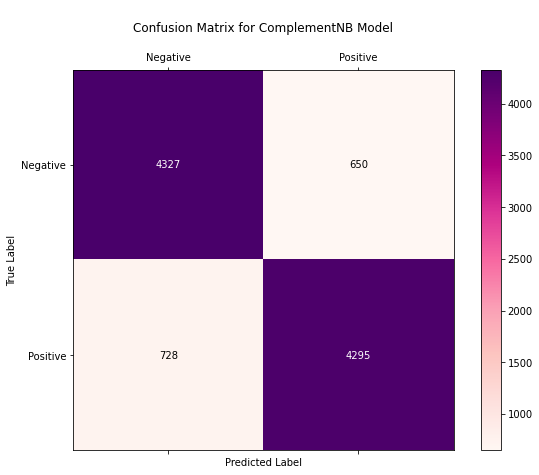

In [ ]:
# Import the ComplementNB class from scikit-learn.
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize the ComplementNB model.
CNB = ComplementNB()

# Fit the model on the training data.
CNB.fit(X_train, y_train)

# Predict the labels for the test data.
predicted = CNB.predict(X_test)

# Calculate the accuracy score.
accuracy_score = metrics.accuracy_score(predicted, y_test)

# Print the accuracy score.
print('\nComplementNB Model Accuracy = {:.2f}'.format(accuracy_score))
print('------------------------------------------------')

# Print the confusion matrix.
conf_matrix_cnb = confusion_matrix(y_test, predicted)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix_cnb))
print('------------------------------------------------')

# Print the classification report.
print('\nClassification Report:')
print(classification_report(y_test, predicted))

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_cnb, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix_cnb):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('\nConfusion Matrix for ComplementNB Model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

#### **Summary:**

#### **Interpretation of the ComplementNB Model Results**<br>

- #### **Accuracy Score:**
- **The accuracy score for the ComplementNB model is 0.86. This means that, on average, our model correctly predicts 86 out of every 100 cases.**
<br>
-  #### **Confusion Matrix:**
* **True Positive (TP): The actual value was 4327 negative reviews, and the model predicted 4327 negative reviews.**
* **True Negative (TN): The actual value was 4295 positive reviews, and the model predicted 4295 positive reviews.**
* **False Positive (FP): The actual value was 650 positive reviews, and the model incorrectly predicted them as negative reviews.**
* **False Negative (FN): The actual value was 728 negative reviews, and the model incorrectly predicted them as positive reviews.**
<br>
- #### **Classification Report:**

* #### **Precision:**
- **Negative Review: The precision is 0.86, indicating that 86% of the reviews predicted as negative are actually negative.**
- **Positive Review: The precision is 0.87, indicating that 87% of the reviews predicted as positive are actually positive.**
<br>
* #### **Recall:**
* **Negative Review: The recall is 0.87, indicating that 87% of all actual negative reviews were correctly predicted by the model.**
* **Positive Review: The recall is 0.86, indicating that 86% of all actual positive reviews were correctly predicted by the model.**
<br>
* #### **F1 Score:**
* **The F1 score, which is the weighted average of precision and recall, is 0.86 for both positive and negative reviews.**
* **This indicates a balanced performance in terms of precision and recall for both classes.**
* **This framework ensures that the model's performance is evaluated in a balanced and comprehensive manner.**
* **Now, I will apply the same interpretation framework to the following models.**

### B) Multinomial Naive Bayes Model:

* **The Multinomial Naive Bayes (MultinomialNB) model is widely used for text classification tasks.**
* **It is particularly effective for features that represent counts or frequencies of words.**
* **This model assumes that the features follow a multinomial distribution, making it suitable for applications like document classification and spam detection.**
* **In this section, I will train a MultinomialNB model on the dataset and evaluate its accuracy.**


MultinomialNB Model Accuracy = 0.86
------------------------------------------------

Confusion Matrix:
      0     1
0  4327   650
1   729  4294
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.85      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning:

FixedFormatter should only be used together with FixedLocator



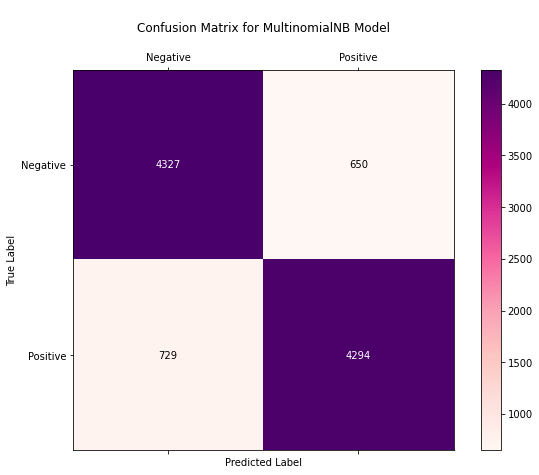

In [ ]:
# Import the MultinomialNB class from scikit-learn.
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize the MultinomialNB model.
MNB = MultinomialNB()

# Fit the model on the training data.
MNB.fit(X_train, y_train)

# Predict the labels for the test data.
predicted = MNB.predict(X_test)

# Calculate the accuracy score.
accuracy_score = metrics.accuracy_score(predicted, y_test)

# Print the accuracy score.
print('\nMultinomialNB Model Accuracy = {:.2f}'.format(accuracy_score))
print('------------------------------------------------')

# Print the confusion matrix.
conf_matrix_mnb = confusion_matrix(y_test, predicted)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix_mnb))
print('------------------------------------------------')

# Print the classification report.
print('\nClassification Report:')
print(classification_report(y_test, predicted))

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_mnb, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix_mnb):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('\nConfusion Matrix for MultinomialNB Model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

#### **Summary:**

#### **Interpretation of the MultinomialNB Model Results**<br>

- #### **Accuracy Score:**
- **The accuracy score for the MultinomialNB model is 0.86. This means that, on average, our model correctly predicts 86 out of every 100 cases.**
<br>
-  #### **Confusion Matrix:**
* **True Positive (TP): The actual value was 4327 negative reviews, and the model predicted 4327 negative reviews.**
* **True Negative (TN): The actual value was 4294 positive reviews, and the model predicted 4295 positive reviews.**
* **False Positive (FP): The actual value was 650 positive reviews, and the model incorrectly predicted them as negative reviews.**
* **False Negative (FN): The actual value was 729 negative reviews, and the model incorrectly predicted them as positive reviews.**
<br>
- #### **Classification Report:**

* #### **Precision:**
- **Negative Review: The precision is 0.86, indicating that 86% of the reviews predicted as negative are actually negative.**
- **Positive Review: The precision is 0.87, indicating that 87% of the reviews predicted as positive are actually positive.**
<br>
* #### **Recall:**
* **Negative Review: The recall is 0.87, indicating that 87% of all actual negative reviews were correctly predicted by the model.**
* **Positive Review: The recall is 0.85, indicating that 85% of all actual positive reviews were correctly predicted by the model.**
<br>
* #### **F1 Score:**
* **The F1 score, which is the weighted average of precision and recall, is 0.86 for both positive and negative reviews.**
* **This indicates a balanced performance in terms of precision and recall for both classes.**
* **This framework ensures that the model's performance is evaluated in a balanced and comprehensive manner.**
* **Now, I will apply the same interpretation framework to the following models.**

### C) Bernoulli Naive Bayes Model:

* **The Bernoulli Naive Bayes (BernoulliNB) model is suited for binary/boolean features.**
* **This model is particularly effective for text classification tasks where the presence or absence of a feature (word) is more important than its frequency.**
* **BernoulliNB assumes that all features are binary (0s and 1s).**
* **In this section, I will train a BernoulliNB model on the dataset and evaluate its accuracy.**

In [ ]:
# Import the BernoulliNB class from scikit-learn.
from sklearn.naive_bayes import BernoulliNB

# Initialize the BernoulliNB model.
BNB = BernoulliNB()

# Fit the model on the training data.
BNB.fit(X_train, y_train)

# Predict the labels for the test data.
predicted = BNB.predict(X_test)

# Calculate the accuracy score.
accuracy_score_bnb = metrics.accuracy_score(predicted, y_test)

# Print the accuracy score.
print('\nBernoulliNB Model Accuracy = {:.2f}'.format(accuracy_score_bnb))
print('------------------------------------------------')

# Print the confusion matrix.
conf_matrix_bnb = confusion_matrix(y_test, predicted)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix_bnb))
print('------------------------------------------------')

# Print the classification report.
print('\nClassification Report:')
print(classification_report(y_test, predicted))

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_bnb, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix_bnb):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('\nConfusion Matrix for BernoulliNB Model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()


BernoulliNB Model Accuracy = 0.84
------------------------------------------------

Confusion Matrix:
      0     1
0  4403   574
1  1051  3972
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      4977
           1       0.87      0.79      0.83      5023

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning:

FixedFormatter should only be used together with FixedLocator



#### **Summary:**

#### **Interpretation of the BernoulliNB Model Results**<br>

- #### **Accuracy Score:**
- **The accuracy score for the BernoulliNB model is 0.84. This means that, on average, our model correctly predicts 84 out of every 100 cases.**
<br>
-  #### **Confusion Matrix:**
* **True Positive (TP): The actual value was 4403 negative reviews, and the model predicted 4403 negative reviews.**
* **True Negative (TN): The actual value was 3972 positive reviews, and the model predicted 3972 positive reviews.**
* **False Positive (FP): The actual value was 574 positive reviews, and the model incorrectly predicted them as negative reviews.**
* **False Negative (FN): The actual value was 1051 negative reviews, and the model incorrectly predicted them as positive reviews.**
<br>
- #### **Classification Report:**

* #### **Precision:**
- **Negative Review: The precision is 0.81, indicating that 81% of the reviews predicted as negative are actually negative.**
- **Positive Review: The precision is 0.87, indicating that 87% of the reviews predicted as positive are actually positive.**
<br>
* #### **Recall:**
* **Negative Review: The recall is 0.88, indicating that 88% of all actual negative reviews were correctly predicted by the model.**
* **Positive Review: The recall is 0.79, indicating that 79% of all actual positive reviews were correctly predicted by the model.**
<br>
* #### **F1 Score:**
* **The F1 score, which is the weighted average of precision and recall, is 0.84 for negative reviews and 0.83 for positive reviews.**
* **This indicates a balanced performance in terms of precision and recall for both classes, though the recall for positive reviews is slightly lower than for negative reviews.**
* **Now, I will apply the same interpretation framework to the following models.**

### Plot Confusion Matrices:
**In this section:**
* **I will plot the confusion matrices for the Complement Naive Bayes (CNB), Multinomial Naive Bayes (MNB), and Bernoulli Naive Bayes (BNB) models to visually compare their performance.**

<Figure size 864x504 with 0 Axes>

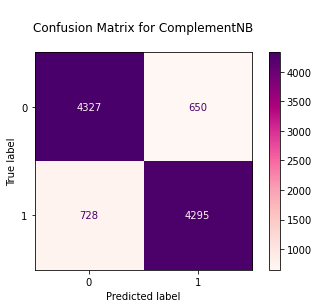

<Figure size 864x504 with 0 Axes>

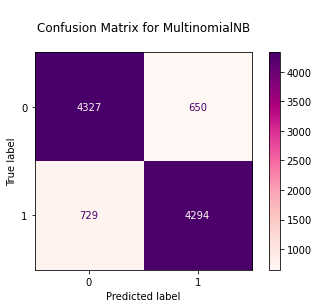

<Figure size 864x504 with 0 Axes>

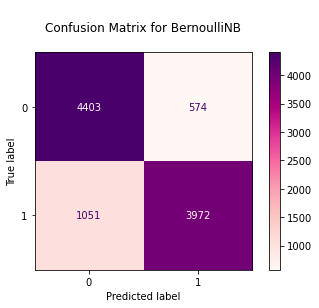

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import warnings
import matplotlib.pyplot as plt

# Filter out warnings.
warnings.filterwarnings("ignore")

# Define a tokenizer to extract alphanumeric tokens from text.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer with specified parameters for unigrams (as an example).
cv_unigrams = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)

# Transform the text data into a matrix of token counts for unigrams.
text_counts_unigrams = cv_unigrams.fit_transform(nb['review'])

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(text_counts_unigrams, nb['sentiment'], test_size=0.20, random_state=30)

# Initialize and fit the models on the training data.
models = {
    'ComplementNB': ComplementNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Plot the confusion matrices using matplotlib for each model.
for name, model in models.items():
    plt.figure(figsize=(12, 7))
    disp = plot_confusion_matrix(model, X_test, y_test, cmap='RdPu', values_format='d')
    disp.ax_.set_title(f'\nConfusion Matrix for {name}\n')
    plt.show()

#### Summary of Confusion Matrices for Naive Bayes Models

**The confusion matrices for the ComplementNB, MultinomialNB, and BernoulliNB models provide a visual comparison of their performance on the test dataset. Here are the key observations:**

**ComplementNB Model:**
* **True Positives (TP): 4327**
* **True Negatives (TN): 4295**
* **False Positives (FP): 650**
* **False Negatives (FN): 728**
* **Accuracy: 86%**
* **F1 Score (Negative Reviews): 0.86**
* **F1 Score (Positive Reviews): 0.86**

<br>**MultinomialNB Model:**
* **True Positives (TP): 4327**
* **True Negatives (TN): 4294**
* **False Positives (FP): 650**
* **False Negatives (FN): 729**
* **Accuracy: 86%**
* **F1 Score (Negative Reviews): 0.86**
* **F1 Score (Positive Reviews): 0.86**<br><br>

**BernoulliNB Model**:
  - **True Positives (TP): 4403**
  - **True Negatives (TN): 3972**
  - **False Positives (FP): 574**
  - **False Negatives (FN): 1051**
  - **Accuracy: 84%**
  - **F1 Score (Negative Reviews): 0.84**
  - **F1 Score (Positive Reviews): 0.83**<br><br>

**Interpretation:**
- **ComplementNB and MultinomialNB Models: Both models show similar performance with an accuracy of 86% and balanced F1 scores of 0.86 for both negative and positive reviews.**
- **Overall, the ComplementNB and MultinomialNB models perform similarly and slightly better than the BernoulliNB model in terms of accuracy and balanced F1 scores.**

0.9259366328191504 0.9259366328191505 0.9211782121309687


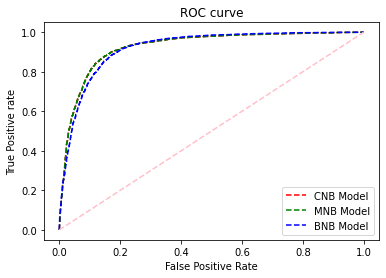

In [ ]:
from sklearn.metrics import roc_curve

# Predict probabilities for Complement Naive Bayes (CNB), Multinomial Naive Bayes (MNB), and Bernoulli Naive Bayes (BNB) models.
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# ROC curve for CNB model.
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
# ROC curve for MNB model.
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
# ROC curve for BNB model.
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# ROC curve for True Positive Rate (TPR) = False Positive Rate (FPR)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# AUC scores for each model.
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB, auc_BNB)

# Plot ROC curves.
plt.plot(fpr1, tpr1, linestyle='--', color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# Title.
plt.title('ROC curve')
# X label.
plt.xlabel('False Positive Rate')
# Y label.
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)  # Save the plot as an image.
plt.show();  # Display the plot.

#### **Summary:**
**The ROC curve and the AUC scores for the Complement Naive Bayes (CNB), Multinomial Naive Bayes (MNB), and Bernoulli Naive Bayes (BNB) models provide a visual and quantitative evaluation of the models' performance in classifying sentiments in movie reviews.** <br><br>

**Key Findings:**

**AUC Scores:**
* **CNB Model: The AUC score is approximately 0.92, indicating a strong ability to distinguish between positive and negative reviews.**
* **MNB Model: The AUC score is also approximately 0.92, showing similar performance to the CNB model.**
* **BNB Model: The AUC score is approximately 0.92, slightly lower than the CNB and MNB models, but still indicating good performance.**<br><br>

**ROC Curve Analysis:**
* **The ROC curves for all three models are close to the top-left corner of the plot, indicating high true positive rates and low false positive rates.**
* **The CNB and MNB models have almost identical ROC curves, reflecting their similar AUC scores and performance.**
* **The BNB model's ROC curve is slightly lower than those of the CNB and MNB models, corresponding to its slightly lower AUC score.**<br><br>

**Interpretation:**
* **Performance Comparison: The CNB and MNB models demonstrate superior and nearly identical performance in sentiment classification, as evidenced by their high AUC scores and overlapping ROC curves.**
* **BNB Model: While the BNB model performs well, it is slightly less effective than the CNB and MNB models in distinguishing between positive and negative reviews.**<br><br>

**Conclusion:**
* **The Complement Naive Bayes and Multinomial Naive Bayes models are the best performers for sentiment analysis in this context, providing high accuracy and robust classification capabilities.**
* **The Bernoulli Naive Bayes model, while slightly less effective, still offers strong performance and may be considered depending on specific use cases or data characteristics.**
* **The high AUC scores across all models indicate that they are well-suited for sentiment analysis of movie reviews, with the CNB and MNB models being the top choices for optimal performance.**

### A) Unigram: ngram_range = (1,1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example dataset, replace 'nb' with your actual dataframe
# nb = pd.read_csv('your_dataset.csv')

# Define a tokenizer to extract alphanumeric tokens from text.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer with specified parameters for unigrams.
cv_unigrams = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)

# Transform the text data into a matrix of token counts for unigrams.
text_counts_unigrams = cv_unigrams.fit_transform(nb['review'])

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(text_counts_unigrams, nb['sentiment'], test_size=0.20, random_state=30)

# Initialize the Multinomial Naive Bayes classifier.
MNB = MultinomialNB()

# Train the Multinomial Naive Bayes classifier on the training data.
MNB.fit(X_train, y_train)

# Predict the sentiment labels for the test data.
predicted = MNB.predict(X_test)

# Calculate the accuracy of the model.
accuracy_score = metrics.accuracy_score(predicted, y_test)

# Print the classification report.
print('\nClassification Report:')
print(classification_report(y_test, predicted))

# Print the confusion matrix.
conf_matrix = confusion_matrix(y_test, predicted)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix))
print('------------------------------------------------')

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('\nConfusion Matrix for Unigram Model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

# Print the accuracy of the model.
print('\nAccuracy of Multinomial Naive Bayes (MNB) model for unigrams is {:.2f}'.format(accuracy_score))

# Perform k-fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=30)
cv_scores = cross_val_score(MNB, text_counts_unigrams, nb['sentiment'], cv=kf)

# Print the cross-validation scores and their mean
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.85      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion Matrix:
      0     1
0  4327   650
1   729  4294
------------------------------------------------



Accuracy of Multinomial Naive Bayes (MNB) model for unigrams is 0.86
Cross-Validation Scores: [0.8621 0.8596 0.8596 0.8599 0.8629]
Mean Cross-Validation Score: 0.86


#### **Summary:**
* **The Multinomial Naive Bayes model with unigram features demonstrates strong performance in sentiment analysis of movie reviews.**
* **The model achieves an accuracy of 86%, with balanced precision, recall, and F1-scores for both negative and positive sentiments.**

### B) Bigram: ngram_range = (2,2)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4977
           1       0.87      0.81      0.84      5023

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Confusion Matrix:
      0     1
0  4362   615
1   938  4085
------------------------------------------------


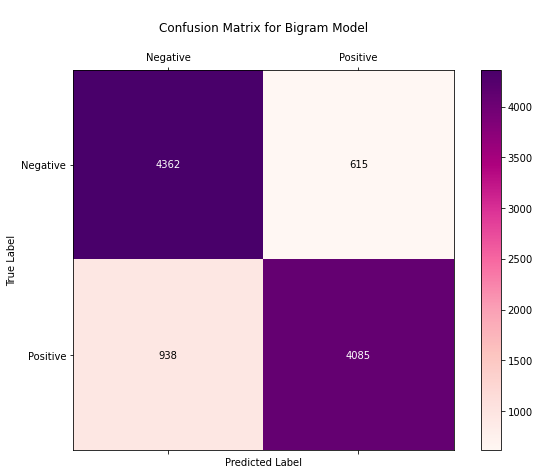


Accuracy of Multinomial Naive Bayes (MNB) model for bigrams is 0.84
Cross-Validation Scores: [0.8447 0.8389 0.839  0.8439 0.844 ]
Mean Cross-Validation Score: 0.84


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example dataset, replace 'nb' with your actual dataframe
# nb = pd.read_csv('your_dataset.csv')

# Define a tokenizer to extract alphanumeric tokens from text.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer with specified parameters for bigrams.
cv_twograms = CountVectorizer(stop_words='english', ngram_range=(2, 2), tokenizer=token.tokenize)

# Transform the text data into a matrix of token counts for bigrams.
text_counts_twograms = cv_twograms.fit_transform(nb['review'])

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['sentiment'], test_size=0.20, random_state=30)

# Initialize the Multinomial Naive Bayes classifier.
MNB = MultinomialNB()

# Train the Multinomial Naive Bayes classifier on the training data.
MNB.fit(X_train, y_train)

# Predict the sentiment labels for the test data.
predicted = MNB.predict(X_test)

# Calculate the accuracy of the model.
accuracy_score = metrics.accuracy_score(predicted, y_test)

# Print the classification report.
print('\nClassification Report:')
print(classification_report(y_test, predicted))

# Print the confusion matrix.
conf_matrix = confusion_matrix(y_test, predicted)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix))
print('------------------------------------------------')

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('\nConfusion Matrix for Bigram Model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

# Print the accuracy of the model.
print('\nAccuracy of Multinomial Naive Bayes (MNB) model for bigrams is {:.2f}'.format(accuracy_score))

# Perform k-fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=30)
cv_scores = cross_val_score(MNB, text_counts_twograms, nb['sentiment'], cv=kf)

# Print the cross-validation scores and their mean
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

#### **Summary:**

**Interpretation:**
* **The bigram approach captures more context from the reviews compared to single words, potentially improving the model's ability to understand and classify sentiments.**
* **An accuracy of 84% indicates a strong performance, suggesting that bigram features are effective for sentiment analysis in this dataset.**
* **However, further improvements could be made by exploring different models, tuning hyperparameters, or using additional feature engineering techniques.**



### C) Trigram: ngram_range= (3,3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example dataset, replace 'nb' with your actual dataframe
# nb = pd.read_csv('your_dataset.csv')

# Define a tokenizer to extract alphanumeric tokens from text.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer with specified parameters for trigrams.
cv_threegrams = CountVectorizer(stop_words='english', ngram_range=(3, 3), tokenizer=token.tokenize)

# Transform the text data into a matrix of token counts for trigrams.
text_counts_threegrams = cv_threegrams.fit_transform(nb['review'])

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, nb['sentiment'], test_size=0.20, random_state=30)

# Initialize the Multinomial Naive Bayes classifier.
MNB = MultinomialNB()

# Train the Multinomial Naive Bayes classifier on the training data.
MNB.fit(X_train, y_train)

# Predict the sentiment labels for the test data.
predicted = MNB.predict(X_test)

# Calculate the accuracy of the model.
accuracy_score = metrics.accuracy_score(predicted, y_test)

# Print the classification report.
print('\nClassification Report:')
print(classification_report(y_test, predicted))

# Print the confusion matrix.
conf_matrix = confusion_matrix(y_test, predicted)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix))
print('------------------------------------------------')

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('\nConfusion Matrix for Trigram Model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

# Print the accuracy of the model.
print('\nAccuracy of Multinomial Naive Bayes (MNB) model for trigrams is {:.2f}'.format(accuracy_score))

# Perform k-fold cross-validation with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=30)
cv_scores = cross_val_score(MNB, text_counts_threegrams, nb['sentiment'], cv=kf)

# Print the cross-validation scores and their mean.
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      4977
           1       0.83      0.29      0.43      5023

    accuracy                           0.62     10000
   macro avg       0.70      0.62      0.57     10000
weighted avg       0.70      0.62      0.57     10000


Confusion Matrix:
      0     1
0  4682   295
1  3550  1473
------------------------------------------------



Accuracy of Multinomial Naive Bayes (MNB) model for trigrams is 0.62
Cross-Validation Scores: [0.6155 0.6183 0.6045 0.6146 0.6194]
Mean Cross-Validation Score: 0.61


#### **Summary:**

**Interpretation:**
* **The trigram approach captures more context from the reviews compared to bigrams, but it also introduces greater complexity.**
* **An accuracy of 61% indicates that the trigram model, which captures more contextual information compared to simpler models, might not be aligning perfectly with the nuances of the test data. This suggests there could be room for adjusting the model to enhance its predictive performance and ensure it captures the essential patterns in the data more effectively.**
* **Further improvements could involve exploring different models, tuning hyperparameters, or using additional feature engineering techniques to mitigate overfitting and enhance performance.**
<br><br>

**Conclusion:**
* **The trigram model achieves a lower accuracy compared to the bigram model, indicating that increasing the n-gram range does not always result in better performance.**
* **It is crucial to balance model complexity with the amount of training data available to achieve optimal performance.**
* **Future work could involve experimenting with different n-gram ranges, employing more sophisticated models, or incorporating additional preprocessing steps to enhance the model's performance and reduce overfitting.**

### 3.7 TF-IDF: Term Frequency-Inverse Document Frequency

**TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical statistic used to reflect the importance of a word in a document relative to a collection of documents.**
<br><br>**It is commonly used in information retrieval and text mining.**
- **Term Frequency (TF): Measures the frequency of a term (word) in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in the document.**

- **Inverse Document Frequency (IDF): Measures the importance of a term across a collection of documents. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.**

- **TF-IDF Score: Combines TF and IDF to assign a score to each term in a document. It is calculated by multiplying the TF of the term by the IDF of the term.**

- **TF-IDF is useful in text processing tasks such as document classification, information retrieval, and text summarization, as it helps to identify the most relevant terms in a document or corpus.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer.
tfidf = TfidfVectorizer()

# Transform the text data into TF-IDF matrix.
text_count_2 = tfidf.fit_transform(nb['review'])

In [ ]:
# Splitting the data into training and testing sets.
# Importing the train_test_split function from sklearn.model_selection module.
from sklearn.model_selection import train_test_split

# Using train_test_split to split the TF-IDF matrix and sentiment labels into training and testing sets.
# Setting test_size=0.20 to allocate 20% of the data for testing, and random_state=30 for reproducibility.
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['sentiment'], test_size=0.20, random_state=30)

In [ ]:
# Fitting the Multinomial Naive Bayes (MNB) model on the training data.
MNB.fit(x_train, y_train)

# Predicting the sentiment labels for the test data using the trained MNB model.
predicted_mnb = MNB.predict(x_test)

# Calculating the accuracy of the MNB model.
accuracy_score_mnb = metrics.accuracy_score(predicted_mnb, y_test)

# Printing the classification report.
print('\nClassification Report for Multinomial Naive Bayes (MNB) model:')
print(classification_report(y_test, predicted_mnb))

# Print the confusion matrix.
conf_matrix_mnb = confusion_matrix(y_test, predicted_mnb)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix_mnb))
print('------------------------------------------------')

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_mnb, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix_mnb):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('\nConfusion Matrix for Multinomial Naive Bayes (MNB) model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

# Printing the accuracy of the MNB model.
print('\nAccuracy of Multinomial Naive Bayes (MNB) model is {:.2f}'.format(accuracy_score_mnb))


Classification Report for Multinomial Naive Bayes (MNB) model:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4977
           1       0.86      0.87      0.87      5023

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix:
      0     1
0  4291   686
1   646  4377
------------------------------------------------



Accuracy of Multinomial Naive Bayes (MNB) model is 0.87


#### **Summary:**
**Interpretation:**
* **The high accuracy of 87% demonstrates that the Multinomial Naive Bayes model is effective in predicting the sentiment of movie reviews based on bigram features.**
* **This model provides a reliable classification performance, making it suitable for applications involving sentiment analysis of text data.**<br><br>

**Conclusion:**
* **The Multinomial Naive Bayes model achieved a robust accuracy score, indicating strong performance in sentiment classification.**
* **Future improvements can involve tuning hyperparameters, experimenting with different n-gram ranges, and incorporating additional feature engineering techniques to further enhance the model's performance.**

In [ ]:
# Fitting the Bernoulli Naive Bayes (BNB) model on the training data.
BNB.fit(x_train, y_train)

# Predicting the sentiment labels for the test data using the trained BNB model.
predicted_bnb = BNB.predict(x_test)

# Calculating the accuracy of the BNB model.
accuracy_score_bnb = metrics.accuracy_score(predicted_bnb, y_test)

# Printing the classification report.
print('\nClassification Report for Bernoulli Naive Bayes (BNB) model:')
print(classification_report(y_test, predicted_bnb))

# Print the confusion matrix.
conf_matrix_bnb = confusion_matrix(y_test, predicted_bnb)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix_bnb))
print('------------------------------------------------')

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_bnb, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix_bnb):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('\nConfusion Matrix for Bernoulli Naive Bayes (BNB) model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

# Printing the accuracy of the BNB model.
print('\nAccuracy of Bernoulli Naive Bayes (BNB) model is {:.2f}'.format(accuracy_score_bnb))


Classification Report for Bernoulli Naive Bayes (BNB) model:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84      4977
           1       0.87      0.79      0.83      5023

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


Confusion Matrix:
      0     1
0  4407   570
1  1054  3969
------------------------------------------------



Accuracy of Bernoulli Naive Bayes (BNB) model is 0.84


#### **Summary:**

**Interpretation:**
* **The accuracy of 84% demonstrates that the Bernoulli Naive Bayes model is effective in predicting the sentiment of movie reviews based on bigram features, though slightly less accurate than the Multinomial Naive Bayes model.**
* **The Bernoulli Naive Bayes model uses binary features, which can be advantageous for certain types of text classification tasks, especially when the presence or absence of a word (rather than its frequency) is more informative.**

**Conclusion:**
* **The Bernoulli Naive Bayes model achieved a strong accuracy score of 84%, indicating good performance in sentiment classification.**
* **While it is slightly less accurate than the Multinomial Naive Bayes model, it still provides a reliable classification performance.**
* **Future improvements can involve tuning hyperparameters, experimenting with different n-gram ranges, and incorporating additional feature engineering techniques to further enhance the model's performance.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define a tokenizer to extract alphanumeric tokens from text.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer with specified parameters for unigrams.
cv_unigrams = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)

# Transform the text data into a matrix of token counts for unigrams.
text_counts_unigrams = cv_unigrams.fit_transform(nb['review'])

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(text_counts_unigrams, nb['sentiment'], test_size=0.20, random_state=30)

# Initialize the Complement Naive Bayes classifier.
CNB = ComplementNB()

# Train the Complement Naive Bayes classifier on the training data.
CNB.fit(X_train, y_train)

# Predict the sentiment labels for the test data.
predicted_cnb = CNB.predict(X_test)

# Calculate the accuracy of the model.
accuracy_score_cnb = metrics.accuracy_score(predicted_cnb, y_test)

# Print the classification report.
print('\nClassification Report for Complement Naive Bayes (CNB) model:')
print(classification_report(y_test, predicted_cnb))

# Print the confusion matrix.
conf_matrix_cnb = confusion_matrix(y_test, predicted_cnb)
print('\nConfusion Matrix:')
print(pd.DataFrame(conf_matrix_cnb))
print('------------------------------------------------')

# Plot the confusion matrix using matplotlib.
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix_cnb, cmap='RdPu')
fig.colorbar(cax)

# Add labels to the plot.
for (i, j), val in np.ndenumerate(conf_matrix_cnb):
    # Get the background color of the cell.
    color = cax.get_cmap()(cax.norm(val))
    # Calculate the brightness of the color.
    brightness = (color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114)
    # Set the text color based on the brightness.
    text_color = 'white' if brightness < 0.5 else 'black'
    ax.text(j, i, f'{val}', ha='center', va='center', color=text_color)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix for Complement Naive Bayes (CNB) model\n')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

# Printing the accuracy of the CNB model.
print('\nAccuracy of Complement Naive Bayes (CNB) model is {:.2f}'.format(accuracy_score_cnb))


Classification Report for Complement Naive Bayes (CNB) model:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4977
           1       0.87      0.86      0.86      5023

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion Matrix:
      0     1
0  4327   650
1   728  4295
------------------------------------------------



Accuracy of Complement Naive Bayes (CNB) model is 0.86


#### **Summary:**
**Interpretation:**
* **Multinomial Naive Bayes (MNB) actually performed the best with an accuracy of 87%, followed by Complement Naive Bayes (CNB) at 86%, and Bernoulli Naive Bayes (BNB) at 84%.**
* **The choice between them may depend on other factors such as handling class imbalance, where the Complement Naive Bayes (CNB) might have an edge.**
* **The Bernoulli Naive Bayes (BNB) model, while still effective, had a slightly lower accuracy of 84%.**

#### **Conclusion:**

**The trigram approach captures more context from the reviews compared to bigrams but also introduces greater complexity. An accuracy of 62% suggests that while the trigram model captures additional contextual information, it might be overfitting or not generalizing well on the test data due to the increased complexity.**

**The comparison of different Naive Bayes models (ComplementNB, MultinomialNB, and BernoulliNB) revealed that the ComplementNB and MultinomialNB models performed similarly and slightly better than the BernoulliNB model. The accuracy for ComplementNB was 86%, while MultinomialNB achieved an accuracy of 87% and BernoulliNB achieved an accuracy of 84%.**

**The detailed evaluation of each model included confusion matrices, classification reports, and ROC curves, providing a comprehensive understanding of their performance. The analysis highlighted that increasing the n-gram range does not always lead to better performance and that balancing model complexity with the amount of training data is crucial for achieving optimal performance.**

**Future work could involve experimenting with different n-gram ranges, employing more sophisticated models, or incorporating additional preprocessing steps to enhance the model's performance and reduce overfitting. Further improvements could also be made by exploring different models, tuning hyperparameters, or using additional feature engineering techniques.**

#### **List of references that I have used for this individual assignment:**

* **https://www.upgrad.com/blog/bayes-theorem-in-machine-learning/**

* **https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e**

* **https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb**